In [1]:
#Name(s) here
#Noumik Thadani

# Association Analysis

Association analysis uses machine learning algorithms to extract hidden relationships from large datasets. In this assignment we'll be using one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

The data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

Most of you should use Conda to do the install. If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter. 

Open a command prompt / terminal window and type:

`pip3 install mlxtend`


## Apriori Algorithm

The Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be running this algorithm for generating the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets you'll find association rules that have confidence above the `min_conf` threshold.

In [2]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [3]:
%matplotlib inline

In [4]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [5]:
dataset = load_dataset('BreadBasket_DMS.csv')
#dataset is a 2D list
print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

**Q1.** Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset.

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

               Items
Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
Sandwich         771
Medialuna        616
Hot chocolate    590
Cookies          540
Brownie          379


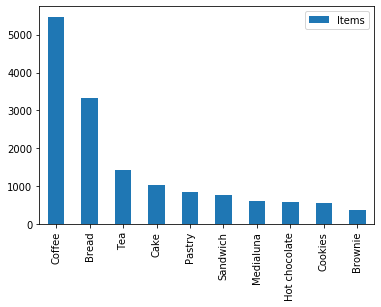

In [33]:
# your code goes here
newSet = []
for i in dataset:
    for j in i:
        newSet.append(j)

cleanedSet = []
for i in newSet:
    if(i != "NONE"):
        cleanedSet.append(i)

df = pd.DataFrame(cleanedSet, columns=['Items'])
valCounts = df['Items'].value_counts().to_frame()

print(valCounts.head(10))
valCounts.head(10).plot.bar()


**Q2.** 

a.) Using `mlxtend.preprocessing.TransactionEncoder` transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table. 

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [40]:
# your code goes here
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
print(te_ary)

first5 = te_ary[:5]
te.inverse_transform(first5)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry']]

**Q3.** Convert the encoded numpy array from Q2 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [49]:
# your code goes here
teDF = pd.DataFrame(te_ary, columns=te.columns_)
teDF.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Q4.** Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1%. Display these itemsets along with their support values.

In [55]:
# your code goes here
freqSets = apriori(tedf, min_support=0.01, use_colnames=True)
freqSets

,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)
5,0.012905,(Chicken Stew)
6,0.475081,(Coffee)
7,0.019305,(Coke)
8,0.054034,(Cookies)
9,0.038926,(Farm House)


**Q5.** Using the frequent itemsets and support counts in Q4, find and display all the maximal frequent itemsets along with their support fraction. Also print a count of how many maximal frequent itemsets you have found.

In [110]:
# your code goes here
maxFreqSets = freqSets.copy()

for index, row in freqSets.iterrows():
    itemset = row['itemsets']
    itemset2 = freqSets.drop(index)
    
    for ind2 in itemset2.index:
        if itemset.issubset(freqSets['itemsets']):
            maxFreqSets = maxFreqSets.drop(index)
            break;

print(maxFreqSets)
print(len(maxFreqSets), "maximal frequent itemsets")


     support                  itemsets
0   0.036093               (Alfajores)
1   0.015948                (Baguette)
2   0.324940                   (Bread)
3   0.039765                 (Brownie)
4   0.103137                    (Cake)
5   0.012905            (Chicken Stew)
6   0.475081                  (Coffee)
7   0.019305                    (Coke)
8   0.054034                 (Cookies)
9   0.038926              (Farm House)
10  0.014899                   (Fudge)
11  0.010492       (Hearty & Seasonal)
12  0.057916           (Hot chocolate)
13  0.014899                     (Jam)
14  0.013115          (Jammie Dodgers)
15  0.038296                   (Juice)
16  0.061379               (Medialuna)
17  0.014059           (Mineral water)
18  0.038191                  (Muffin)
19  0.079005                    (NONE)
20  0.085510                  (Pastry)
21  0.010387                   (Salad)
22  0.071346                (Sandwich)
23  0.028853            (Scandinavian)
24  0.034309             

**Q6.** Using the frequent itemsets and support counts in Q4, find all the closed frequent itemsets along with their support fraction. Also print a count of how many closed frequent itemsets you have found.

In [111]:
# your code goes here
closedFreqSets = freqSets.copy()

for index, row in freqSets.iterrows():
    itemset = row['itemsets']
    itemset2 = freqSets.drop(index)
    
    for ind2 in itemset2.index:
        if itemset.issuperset(freqSets['itemsets']):
            closedFreqSets = closedFreqSets.drop(index)
            break;

print(closedFreqSets)
print(len(closedFreqSets), "closed frequent itemsets")


     support                  itemsets
0   0.036093               (Alfajores)
1   0.015948                (Baguette)
2   0.324940                   (Bread)
3   0.039765                 (Brownie)
4   0.103137                    (Cake)
5   0.012905            (Chicken Stew)
6   0.475081                  (Coffee)
7   0.019305                    (Coke)
8   0.054034                 (Cookies)
9   0.038926              (Farm House)
10  0.014899                   (Fudge)
11  0.010492       (Hearty & Seasonal)
12  0.057916           (Hot chocolate)
13  0.014899                     (Jam)
14  0.013115          (Jammie Dodgers)
15  0.038296                   (Juice)
16  0.061379               (Medialuna)
17  0.014059           (Mineral water)
18  0.038191                  (Muffin)
19  0.079005                    (NONE)
20  0.085510                  (Pastry)
21  0.010387                   (Salad)
22  0.071346                (Sandwich)
23  0.028853            (Scandinavian)
24  0.034309             

**Q7.** Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q4.

In [114]:
# your code goes here
from mlxtend.frequent_patterns import association_rules 
association_rules(freqSets, metric="confidence", min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.036093,0.324940,0.010282,0.284884,0.876728,-0.001446,0.943987
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(Brownie),(Bread),0.039765,0.324940,0.010702,0.269129,0.828244,-0.002219,0.923639
3,(Bread),(Coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131
4,(Cookies),(Bread),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725
5,(Medialuna),(Bread),0.061379,0.324940,0.016787,0.273504,0.841708,-0.003157,0.929201
6,(NONE),(Bread),0.079005,0.324940,0.020564,0.260292,0.801048,-0.005107,0.912604
7,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
8,(Brownie),(Coffee),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799
9,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667


**Q8.** An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying its value between 0 and 1 with increments of 0.1. What happens when we increase the confidence level? Why?

       0
0.0  226
0.1  120
0.2   63
0.3   39
0.4   27
0.5   19
0.6    4
0.7    2
0.8    1
0.9    0
1.0    0


'\nThe confidence level causes the number of rules to reduce. Less rules \nare able to meet the confidence threshold as it increases.\n'

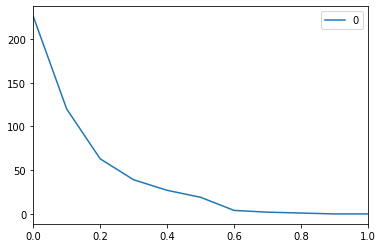

In [132]:
# your code goes here
freqSets2 = apriori(tedf, min_support=0.005, use_colnames=True)
freqSets2

confThres = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

numRules=[]
for i in confThres:
    asnRules = association_rules(freqSets2, metric="confidence", min_threshold=i)
    numRules.append(len(asnRules))
    
df2 = (pd.DataFrame(numRules,confThres))
print(df2)
df2.plot()

"""
The confidence level causes the number of rules to reduce. Less rules 
are able to meet the confidence threshold as it increases.
"""

**Q9.** What value would you choose for the minimum confidence threshold based on the plot in Q8? Why? Display the rules generated for your chosen value. Take a look at the generated rules. Are they interesting? Why/why not?

In [134]:
# your code goes here
association_rules(freqSets2, metric="confidence", min_threshold=0.4)

"""
I would choose a minimum confidence threshold of 0.4.
"""

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
1,(Brownie),(Coffee),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799
2,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
3,(Cookies),(Coffee),0.054034,0.475081,0.028014,0.518447,1.091280,0.002343,1.090053
4,(Hearty & Seasonal),(Coffee),0.010492,0.475081,0.005666,0.540000,1.136648,0.000681,1.141128
5,(Hot chocolate),(Coffee),0.057916,0.475081,0.029378,0.507246,1.067704,0.001863,1.065276
6,(Jammie Dodgers),(Coffee),0.013115,0.475081,0.006610,0.504000,1.060871,0.000379,1.058304
7,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
8,(Keeping It Local),(Coffee),0.006610,0.475081,0.005351,0.809524,1.703969,0.002211,2.755823
9,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
